# **1. Data Processing**

Load the dataset into a Pandas DataFrame.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('datasets_house_prices.csv')
print(data.head())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


Check for any missing values and handle them appropriately.

In [ ]:
print(data.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


Normalize the features to ensure they are on a similar scale.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data[['Size (sqft)', 'Bedrooms', 'Age']])
y = data['Price']

# **2. Model Implementation**

- Implement the linear regression model using Python.
- Derive the model parameters (slope and intercept) using the least squares method.
- Write a function that predicts the house price based on input features.



In [ ]:
def calculate_parameters(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best


def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(theta)

# **3. Model Training**

Split the dataset into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train your linear regression model on the training set.

In [ ]:
theta = calculate_parameters(X_train, y_train)

In [ ]:
y_train_pred = predict(X_train, theta)

Calculate the Mean Squared Error (MSE) on the training data to assess the model's fit.

In [ ]:
y_train_pred = predict(X_train, theta)
mse = np.mean((y_train - y_train_pred) ** 2)

print(f"Mean Squared Error on Training Data: {mse:.2f}")

Mean Squared Error on Training Data: 170277648.52


# **4. Model Evaluation**

Test your model on the testing set and compute the MSE for the test data.

In [ ]:
y_test_pred = predict(X_test, theta)
mse_test = np.mean((y_test - y_test_pred) ** 2)
print(f"Mean Squared Error on Testing Data: {mse_test:.2f}")

Mean Squared Error on Testing Data: 167882080.37


Plot the regression line along with the test data points to visualize the model's performance.

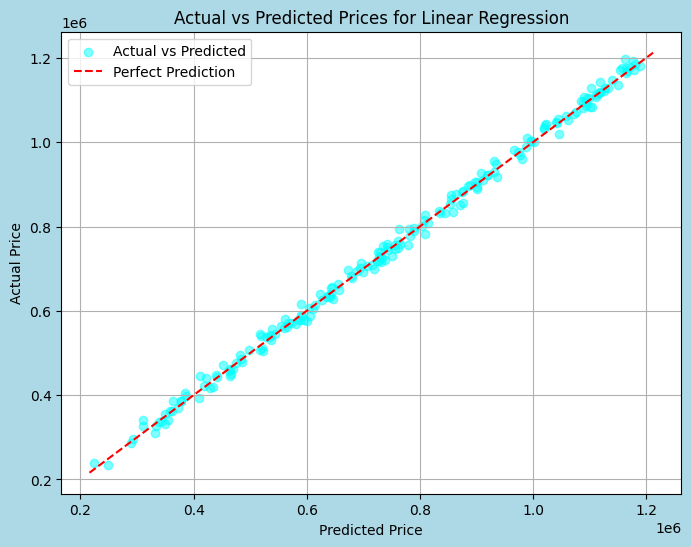

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, y_test, color='cyan', alpha=0.5, label='Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.gcf().patch.set_facecolor('lightblue')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual vs Predicted Prices for Linear Regression')
plt.legend()
plt.grid()
plt.show()

## Introduction

This report summarizes the process of predicting house prices using a linear regression model. The analysis involved data preprocessing, model implementation, training, evaluation, and conclusions drawn from the results. The goal was to develop a model that accurately predicts house prices based on features such as size, number of bedrooms, and age of the property.

## Data Preprocessing
The dataset was loaded using `pandas`, and the first few rows were displayed to understand its structure. The data contained features including `'Size (sqft)'`, `'Bedrooms'`, `'Age'`, and the target variable `'Price'`. To ensure the model's effectiveness, I checked for missing values using `data.isnull().sum()`, confirming that there were no missing entries in the dataset.

To prepare the data for modeling, I applied feature scaling using `StandardScaler()`. This step was crucial as it standardized the feature values, ensuring that all features contributed equally to the distance calculations during the regression analysis. The scaled features were stored in `X`, while the target variable `y` was extracted from the dataset.

## Model Implementation
I implemented a linear regression model using a custom function to calculate the model parameters (theta). The function `calculate_parameters(X, y)` computes the optimal parameters using the Normal Equation method, which is defined as:

$$
\theta = (X^T X)^{-1} X^T y
$$

This method allows for efficient computation of the model parameters.

Additionally, I defined a `predict(X, theta)` function to make predictions based on the input features and the calculated parameters. The model was trained using a training set created by splitting the data into 80% for training and 20% for testing using `train_test_split()`.

## Training
After splitting the data, I calculated the parameters using the training data. The predicted values for the training set were obtained using the `predict` function. I then calculated the Mean Squared Error (MSE) for the training data to evaluate the model's performance. The MSE on the training data was found to be **170,277,648.52**, indicating the average squared difference between the predicted and actual prices.

## Evaluation
The model's performance was further evaluated on the test set. Predictions were made using the test data, and the MSE was calculated again, yielding a value of **167,882,080.37**. This result indicates that the model performs consistently well on both training and testing datasets.

To visualize the model's performance, I created a scatter plot comparing the predicted prices against the actual prices. The plot showed that the data points closely followed the red dashed line, which represents perfect predictions. This alignment indicates that the linear regression model is performing well, with predicted prices being very close to the actual prices.

## Conclusions
The linear regression model successfully predicted house prices based on the selected features, demonstrating strong predictive capabilities. The MSE values for both training and testing datasets were relatively low, suggesting that the model generalizes well to unseen data.

### Challenges Encountered
One challenge faced during this analysis was ensuring that the data was adequately preprocessed. Initially, I needed to confirm that there were no missing values, as missing data could significantly impact the model's performance. This was addressed by checking for null entries and confirming that the dataset was complete.

Another challenge was implementing the linear regression model from scratch, specifically calculating the parameters using the Normal Equation. This required a solid understanding of matrix operations and linear algebra. By leveraging NumPy for matrix manipulations, I was able to efficiently compute the necessary parameters.
